In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [7]:
df = pd.read_excel('data.xlsx', sheet_name='data',parse_dates=True)
df = df[df['Category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ']

In [8]:
df.head()

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
28,Сигма,357953,2019-04-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,1114,17,398.412941,0
29,Сигма,357953,2019-05-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,6160,74,1447.873576,0
30,Сигма,357953,2019-09-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
31,Сигма,357953,2019-10-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
32,Сигма,357953,2019-11-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0


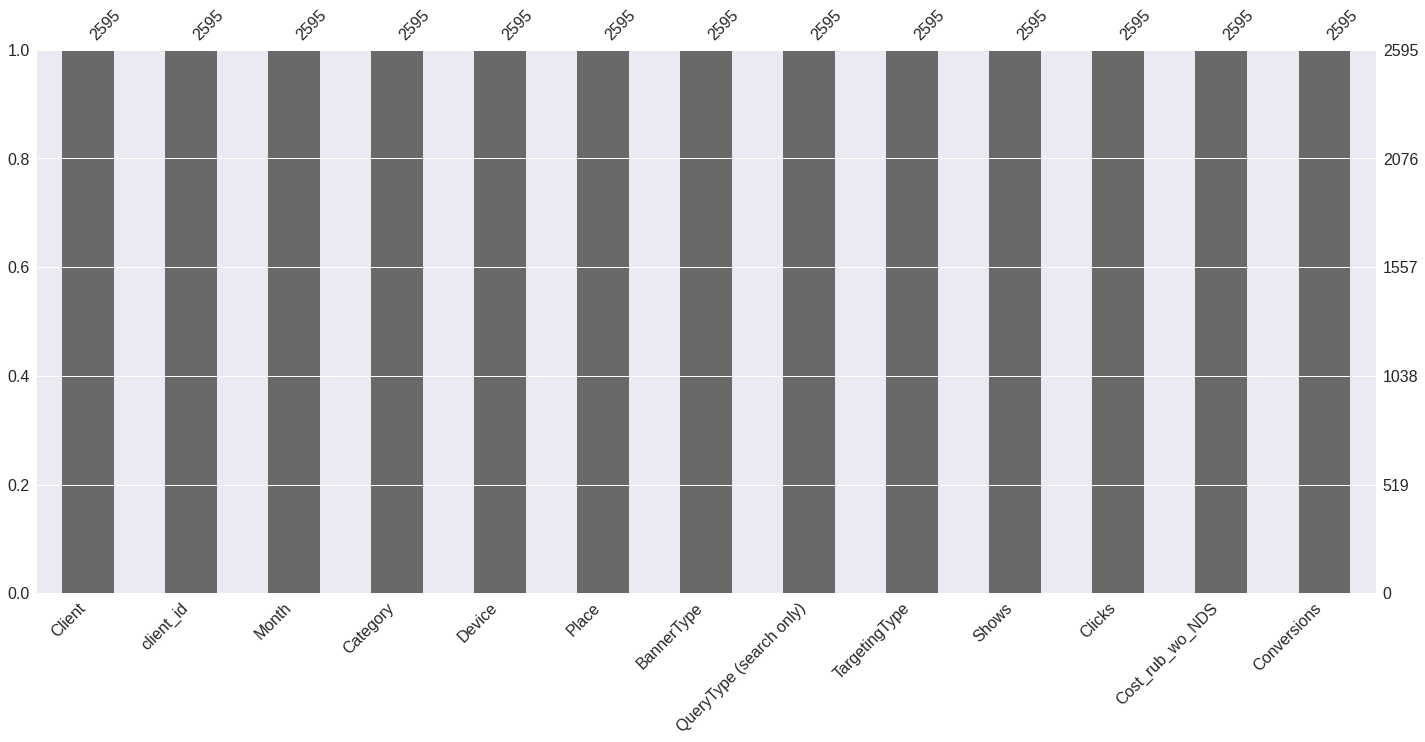

In [9]:
import missingno as msno
msno.bar(df)

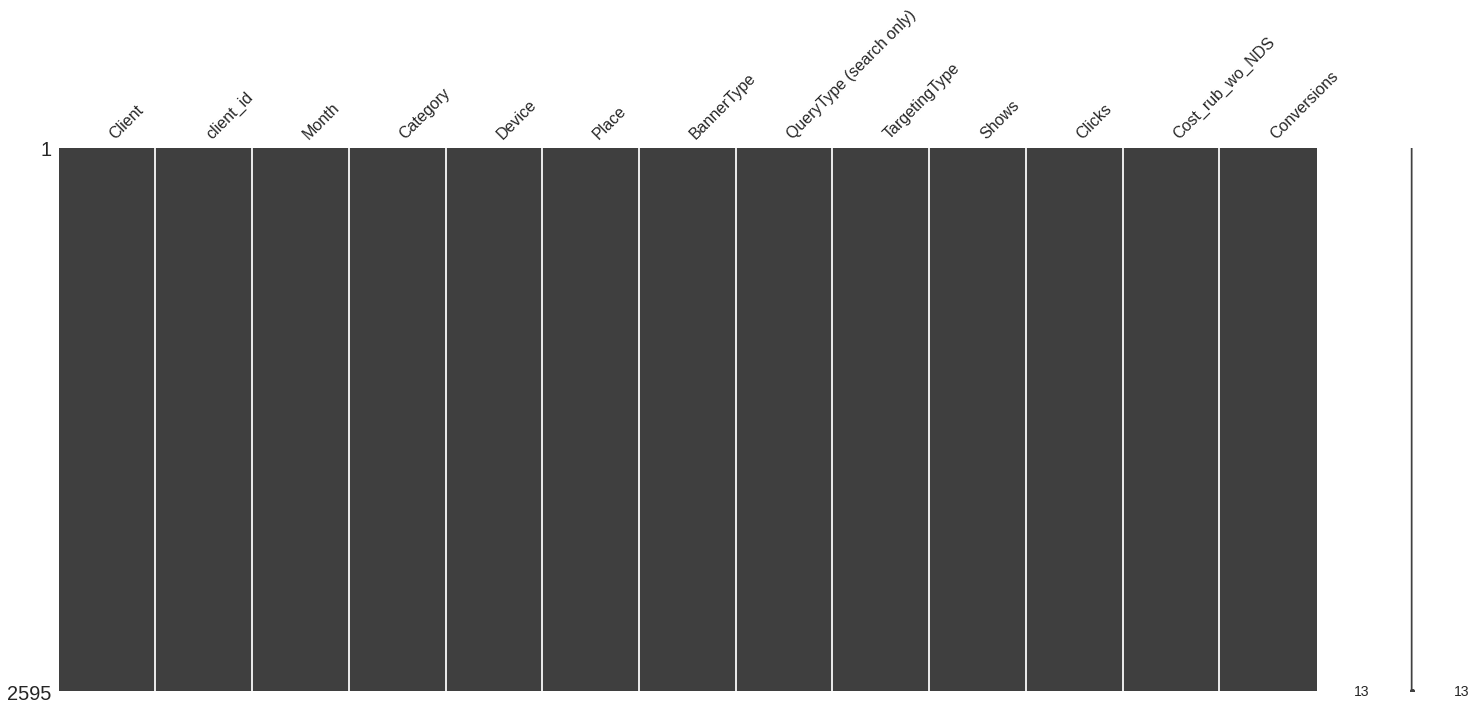

In [10]:
msno.matrix(df)

In [11]:
df.dtypes

Client                             object
client_id                           int64
Month                      datetime64[ns]
Category                           object
Device                             object
Place                              object
BannerType                         object
QueryType (search only)            object
TargetingType                      object
Shows                               int64
Clicks                              int64
Cost_rub_wo_NDS                   float64
Сonversions                         int64
dtype: object

In [12]:
df.describe(include=[np.number])

,client_id,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
count,2595.000000,2.595000e+03,2595.000000,2.595000e+03,2595.000000
mean,410764.662428,2.144221e+06,11989.044701,4.025928e+05,846.422736
std,175512.281535,1.786902e+07,30715.016056,8.774135e+05,2215.655462
min,234679.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,252114.000000,4.350000e+01,0.000000,0.000000e+00,0.000000
50%,357953.000000,2.474600e+04,504.000000,1.891681e+04,18.000000
75%,555392.000000,2.036510e+05,9536.000000,4.361182e+05,555.500000
max,855060.000000,5.259564e+08,567033.000000,8.847957e+06,20492.000000


In [13]:
df.describe(include=[np.object])

,Client,Category,Device,Place,BannerType,QueryType (search only),TargetingType
count,2595,2595,2595,2595,2595,2595,2595
unique,9,1,2,2,6,4,3
top,Псилон,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,none,Phrase
freq,397,2595,1314,1451,1623,1144,1911


In [14]:
df.Client.unique()

array(['Сигма', 'Бета', 'Псилон', 'Гамма', 'Альфа', 'Омега', 'Лямбда',
       'Зета', 'Мета'], dtype=object)

In [15]:
df.client_id.unique()

array([357953, 234679, 285755, 458303, 252114, 333348, 559604, 555392,
       855060])

In [16]:
df.Category.unique()

array(['ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'], dtype=object)

In [17]:
df.Device.unique()

array(['Desktop', 'Mobile'], dtype=object)

In [18]:
df.BannerType.unique()

array(['cpc_video', 'image_ad', 'mcbanner', 'performance', 'text',
       'cpm_banner'], dtype=object)

In [19]:
df.TargetingType.unique()

array(['Phrase', 'Retargeting', 'Autotargeting'], dtype=object)

In [20]:
df.shape

(2595, 13)

In [21]:
df

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
28,Сигма,357953,2019-04-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,1114,17,398.412941,0
29,Сигма,357953,2019-05-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,6160,74,1447.873576,0
30,Сигма,357953,2019-09-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
31,Сигма,357953,2019-10-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
32,Сигма,357953,2019-11-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,Псилон,285755,2019-11-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0
11780,Псилон,285755,2019-12-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0
11781,Псилон,285755,2020-01-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0
11782,Псилон,285755,2020-02-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0


**Первые очевидные результаты и выводы, которые мы можем сделать:**
* В этом наборе данных содержится 12595 иследований и 13 фичей
* Кол-во уникальный клиентов - 9
* Больше всего записей от - Псилон
* В наборе данных 2 устройства и 6 типов баннеров.
* Данные таргетируются по 3м типам.

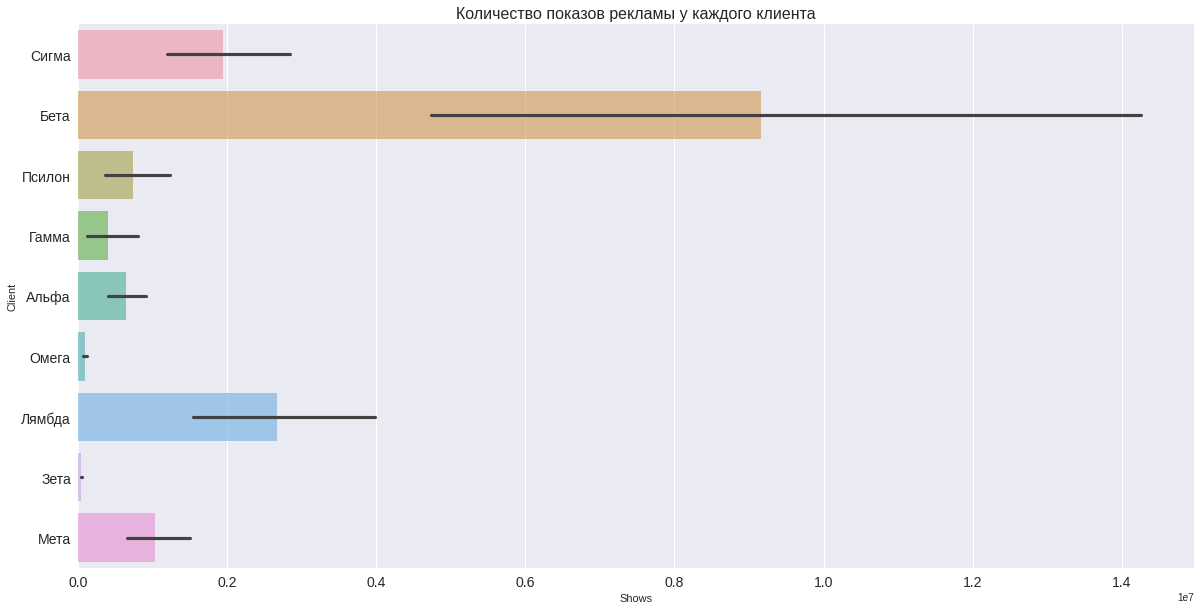

In [22]:

plt.figure(figsize=(20,10))
plt.title("Количество показов рекламы у каждого клиента", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=df.Client, x=df.Shows, alpha=0.6)
plt.show()

**Первые очевидные результаты и выводы, которые мы можем сделать:**
* Можно сказать что больше всего показов было у Беты

In [23]:
# Видно распределение по устройствам

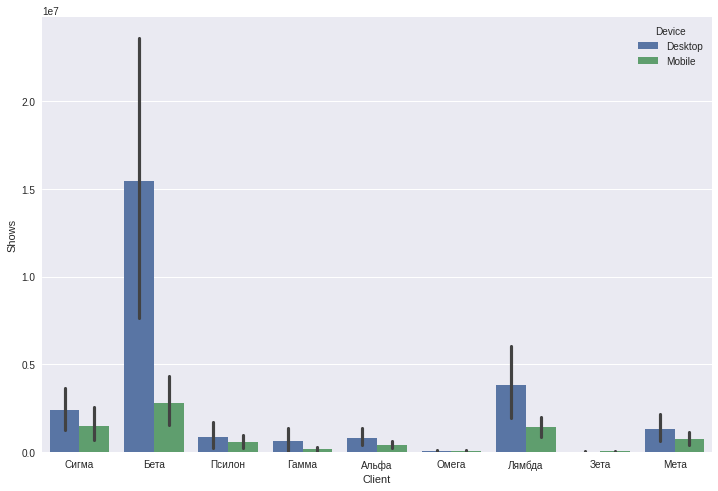

In [24]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Client", y="Shows", hue="Device", data=df)

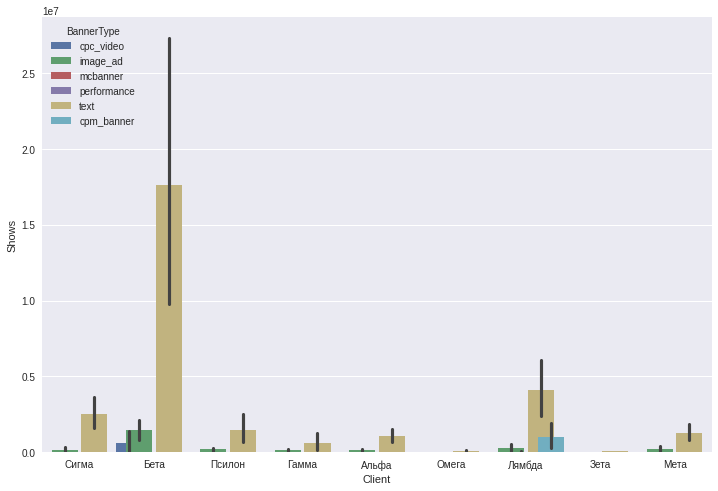

In [25]:
# Видно распределение по типу рекламы
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Client", y="Shows", hue="BannerType", data=df)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

In [26]:
df_group = df.groupby(['Client','Device','Place','BannerType','TargetingType']).agg({'Shows': ['sum'], 
                                            'Clicks': ['sum'],'Сonversions':'sum','Cost_rub_wo_NDS':'sum'})
df_group.head()

Shows  ... Cost_rub_wo_NDS
                                                       sum  ...             sum
Client Device  Place    BannerType TargetingType            ...                
Альфа  Desktop Networks image_ad   Phrase          2738360  ...    1.007925e+05
                                   Retargeting      589241  ...    3.216332e+04
                        text       Phrase         92060323  ...    2.833916e+06
                                   Retargeting    16129383  ...    3.716377e+05
               Search   mcbanner   Phrase           552726  ...    2.044457e+05

[5 rows x 4 columns]

	Описание столбцов таблицы на Листе data
	Client – название клиента
	client_id – идентификатор клиента
	Device – тип устройства
	Place – тип площадки
	BannerType – тип объявления
	QueryType – тип запроса (только для Place: Search)
	TargetingType – тип таргетинга
	Shows – Показы
	Clicks – Клики
	Cost_rub_wo_NDS – Расходы
	Conversions – Целевые визиты


[Text(0.5, 0, 'Date')]

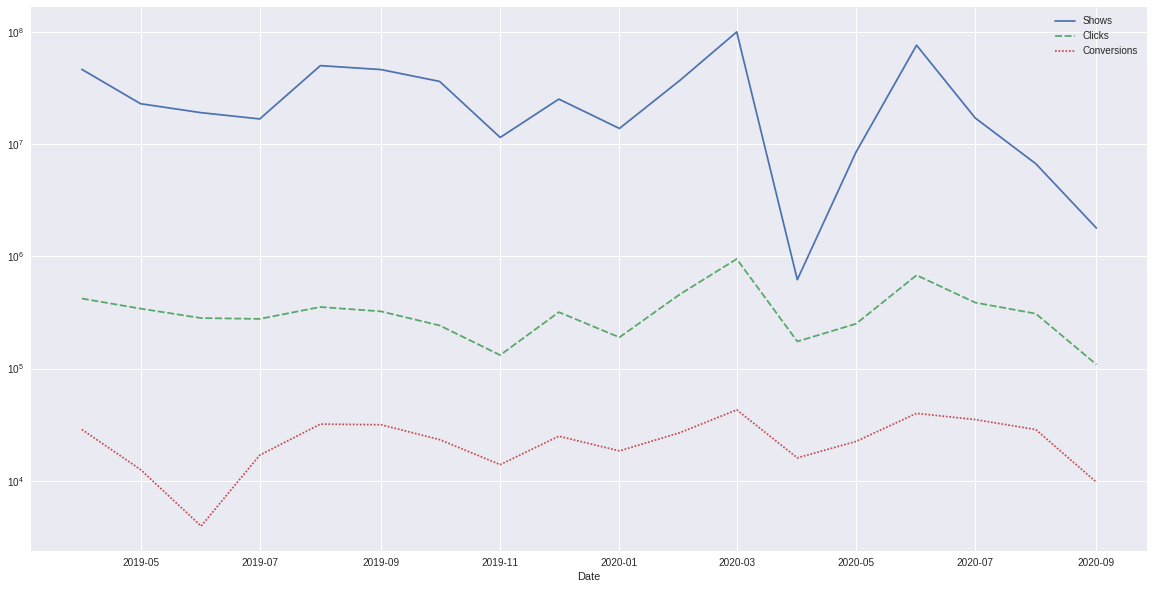

In [27]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Сигма'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

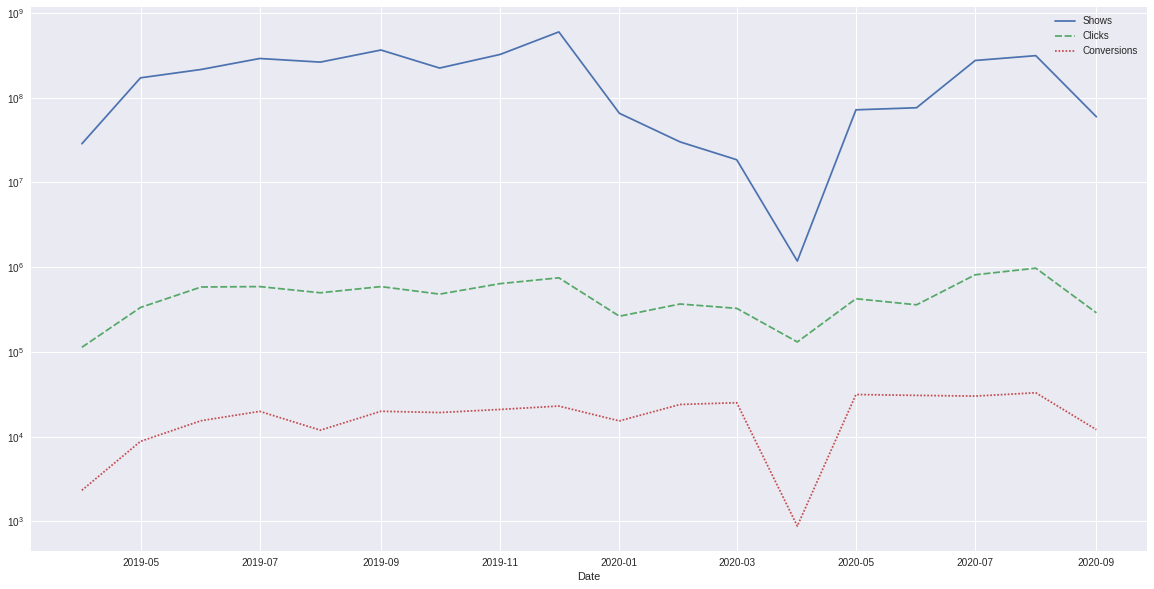

In [28]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Бета'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

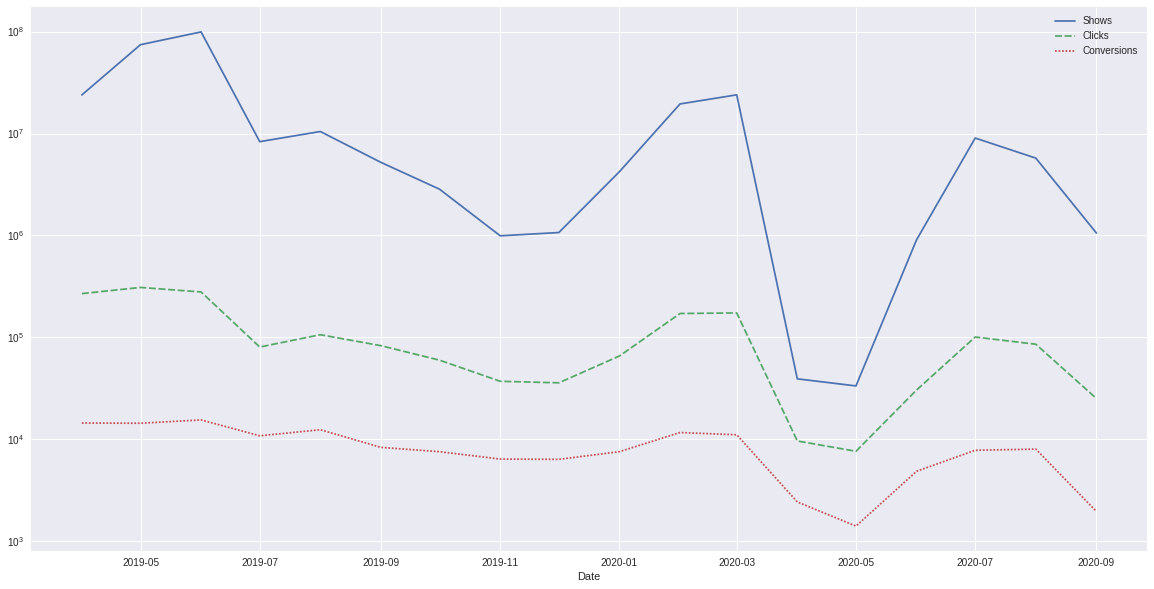

In [29]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Псилон'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

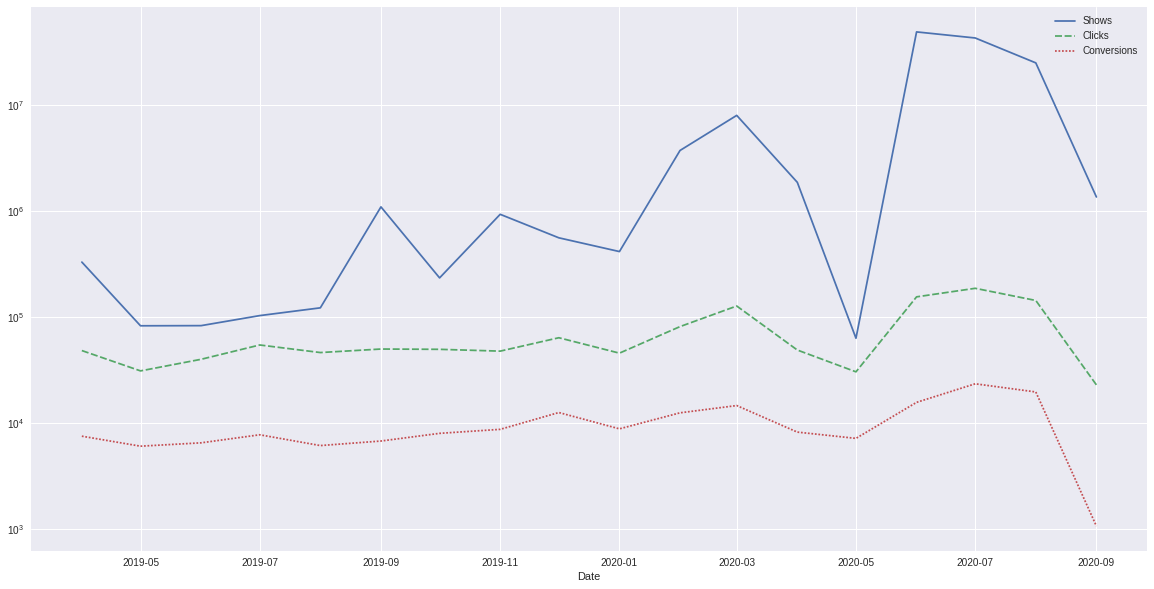

In [30]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Гамма'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

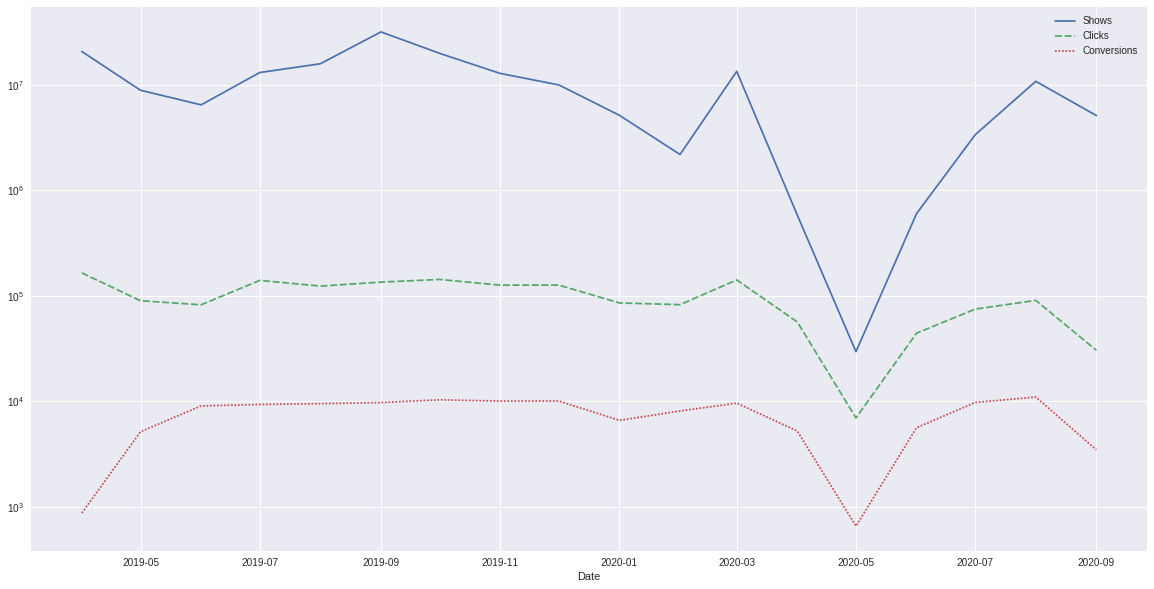

In [31]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Альфа'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

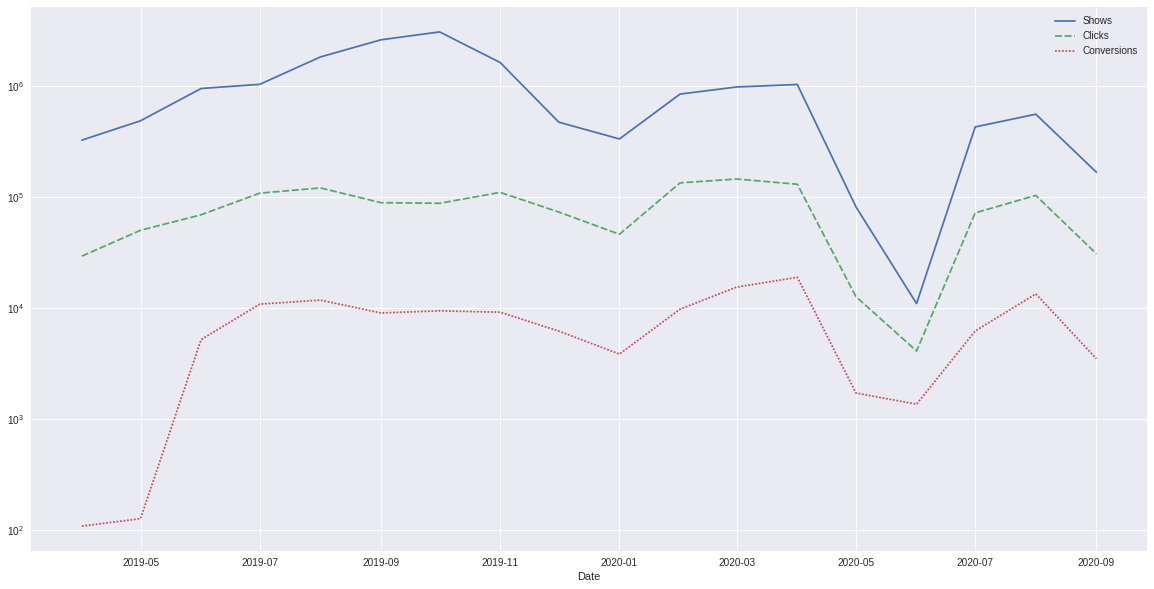

In [32]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Омега'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

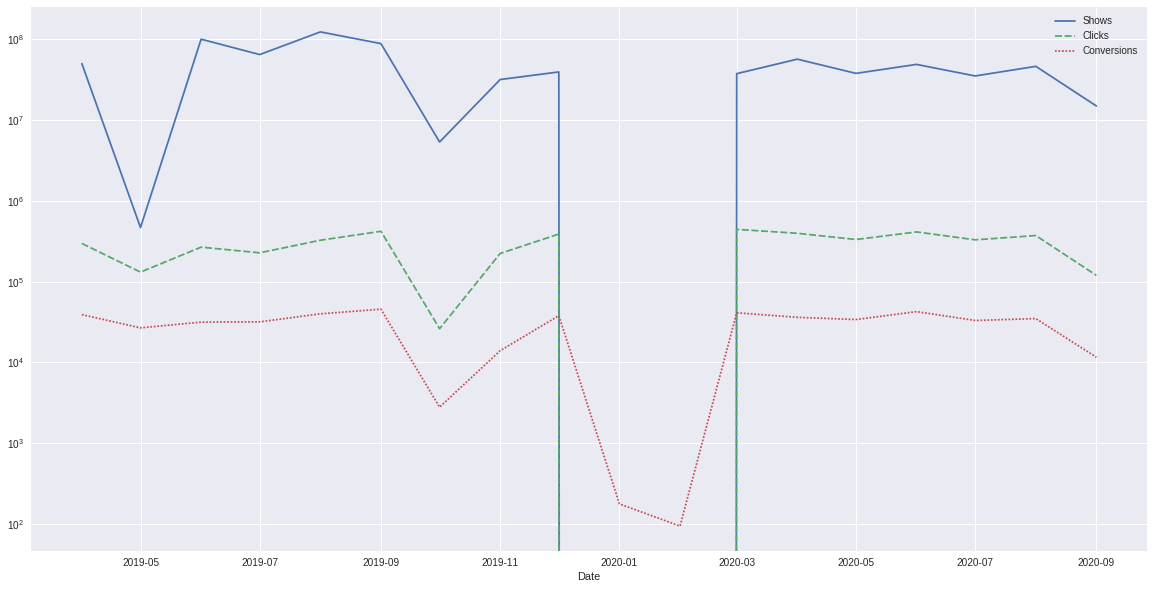

In [33]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Лямбда'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

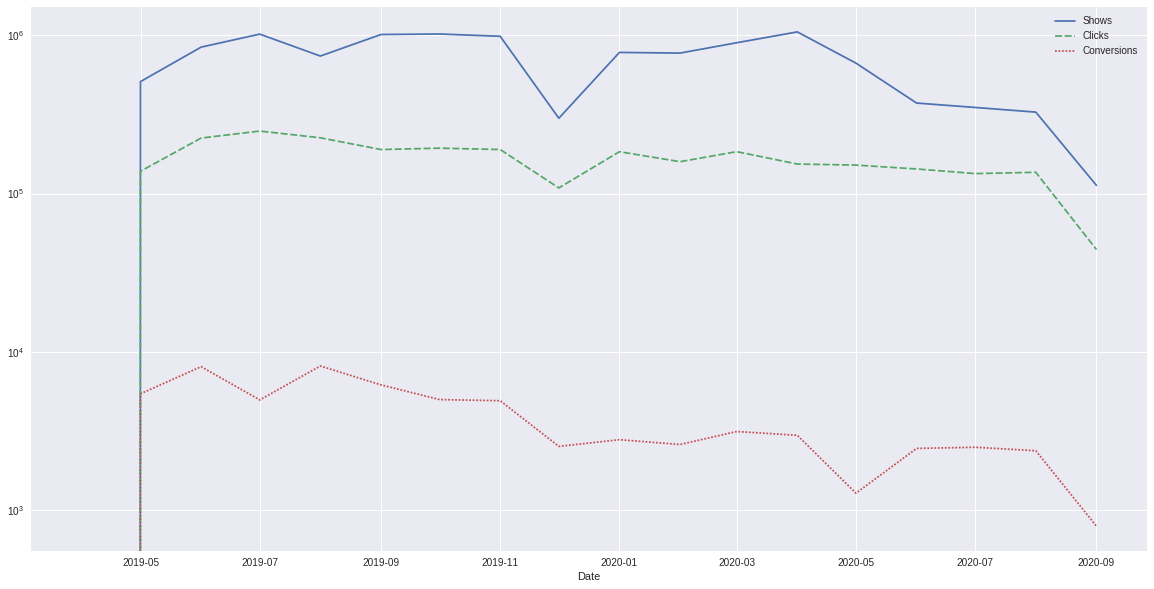

In [34]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Зета'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

[Text(0.5, 0, 'Date')]

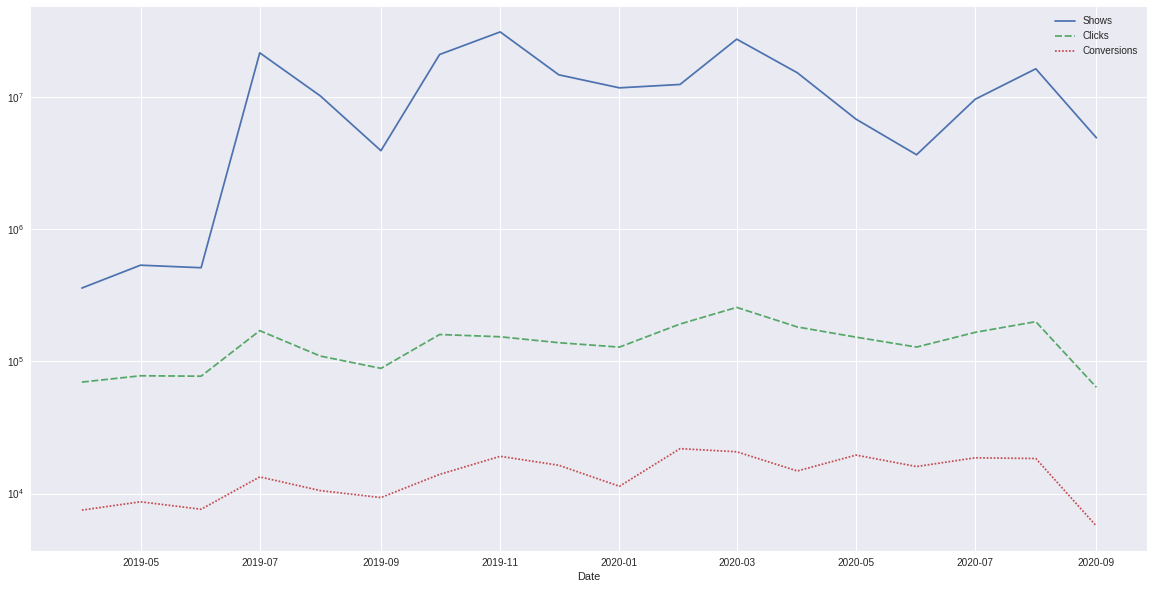

In [35]:
plt.figure(figsize=(20,10))
g_results = sns.lineplot(data= df[df['Client'] == 'Мета'].groupby('Month').agg({"Shows":'sum','Clicks':'sum','Сonversions':'sum'}))
g_results.set(yscale='log')
g_results.set(xlabel='Date')

In [36]:
df_group_two = df.groupby(['Client']).agg({'Shows': ['sum'], 
                                            'Clicks': ['sum'],'Сonversions':'sum','Cost_rub_wo_NDS':'sum'})
df_group_two['persentage_by_cost'] = df_group_two['Cost_rub_wo_NDS']['sum']/df_group_two['Сonversions']['sum']
df_group_two = df_group_two.sort_values('persentage_by_cost',ascending=False)
df_group_two

,Shows,Clicks,Сonversions,Cost_rub_wo_NDS,persentage_by_cost
,sum,sum,sum,sum,
Client,,,,,
Зета,11715920,2802548,66259,8.120744e+07,1225.606229
Бета,3396724007,8530456,343877,3.102310e+08,902.156947
Альфа,180447279,1742843,133974,1.007692e+08,752.154735
Псилон,290845213,1930962,153238,1.143849e+08,746.452630
Омега,16698354,1406207,135136,7.746014e+07,573.201370
Сигма,539686515,6207629,427178,1.233962e+08,288.863643
Лямбда,781311002,4708680,502477,1.433417e+08,285.270223
Гамма,134534736,1266748,180697,5.091865e+07,281.790233


In [37]:
#------------------------

In [38]:
df_omega = df[df['Client'] == 'Омега']
df_omega

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
1137,Омега,333348,2020-08-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,0,0,0.000000,0
8883,Омега,333348,2019-04-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Brand,Phrase,28644,5157,261786.569364,26
8884,Омега,333348,2019-04-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Competitor,Phrase,52368,2145,154108.837576,9
8885,Омега,333348,2019-04-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Other,Phrase,52100,5621,470774.886432,32
8886,Омега,333348,2019-05-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Brand,Phrase,111563,14203,849006.110212,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,Омега,333348,2020-05-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0
11697,Омега,333348,2020-06-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0
11698,Омега,333348,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0
11699,Омега,333348,2020-08-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0


In [39]:
d_test = df_omega[df_omega['Сonversions'] == 0][['Device','Place','BannerType','TargetingType','Shows','Clicks','Cost_rub_wo_NDS','Сonversions']]
d_test[d_test['Cost_rub_wo_NDS']>0]

,Device,Place,BannerType,TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
8895,Desktop,Networks,text,Retargeting,71857,19,497.660822,0
8941,Desktop,Search,text,Phrase,50,3,153.798203,0


In [40]:
# вот эти 2 размещения не выгодны, они не приносят конверсии

In [41]:
d_good = df_omega[df_omega['Сonversions'] != 0][['Device','Place','BannerType','TargetingType','Shows','Clicks','Cost_rub_wo_NDS','Сonversions']]

In [42]:
d_good = d_good[d_good['Cost_rub_wo_NDS'] > 0]
d_good['persentage_conv'] = d_good['Cost_rub_wo_NDS']/d_good['Сonversions']
d_good = d_good.sort_values(['Сonversions','persentage_conv'],ascending=[False,True])
d_good.head(20)

,Device,Place,BannerType,TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,persentage_conv
9005,Mobile,Search,text,Phrase,252984,63441,1.384209e+06,6845,202.221841
9030,Mobile,Search,text,Phrase,179771,47040,1.342937e+06,6807,197.287717
9012,Mobile,Search,text,Phrase,276187,27244,2.127236e+06,5876,362.021030
9010,Mobile,Search,text,Phrase,199064,41630,1.042064e+06,5845,178.282986
9001,Mobile,Search,text,Phrase,248764,62616,1.269685e+06,4840,262.331541
8989,Mobile,Search,text,Phrase,143823,40707,1.500088e+06,4210,356.315468
9007,Mobile,Search,text,Phrase,251418,27471,2.163824e+06,4072,531.391077
8986,Mobile,Search,text,Phrase,249245,24127,3.018705e+06,3991,756.378201
8981,Mobile,Search,text,Phrase,228694,23699,2.730708e+06,3831,712.792588
8974,Mobile,Search,text,Phrase,132372,34834,6.322704e+05,3767,167.844551


In [43]:
d_good['persentage_conv'] = d_good['persentage_conv'].astype('int64') 
d_good.groupby(['Device','Place','BannerType','TargetingType']).agg({'Сonversions':'sum','persentage_conv':'sum'}).sort_values(['Сonversions','persentage_conv'],ascending=[False,True])

,,,,Сonversions,persentage_conv
Device,Place,BannerType,TargetingType,,
Mobile,Search,text,Phrase,94443,238204
Desktop,Search,text,Phrase,40533,166239
Mobile,Networks,text,Retargeting,135,10463
Desktop,Networks,text,Retargeting,24,12364
